# Visualization of GDA data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib as mpl

import requests
from bs4 import BeautifulSoup
import re

%matplotlib inline

___
## Visualize results

Load in previously saved data from csv so that above cells don't need to be rerun.

In [2]:
# Generate plot data
# dfall = pd.read_csv('../genediseaselink-web/GeneDiseaseMoreCats.csv')
dfall = pd.read_csv('GDAallthreehigh.tsv',sep='\t')
dfall.fillna(value='Not Available', inplace=True)
yy = dfall['count_total']
xx = dfall['score_total']
# print(dfall.category.unique())
dfall.head(2)

,diseaseName,geneCount,geneSymbol,diseaseCount,associationType,score_gdn,score_hpo,score_conf,score_total,count_total,parse,category,ideal
0,cystinuria,17,SLC3A1,18,GeneticVariation,0.767593,1,4,0.67463,0.054230,cystinuria,Kidneys and urinary system,1.000173
1,mucopolysaccharidosis vi,6,ARSB,16,GeneticVariation,0.837236,0,4,0.47213,0.137363,mucopolysaccharidosis vi,"Bones, muscles, and connective tissues",1.011331


## Refine data visualization

In general points in the bottom right of the rudimentary graph above are the ideal targets for drug development. Two points stand out in particular 'Canavan disease' and 'Cleidocranial Dysplasia'.

To get more detailed information, the graph will be refocused on the clustered points between scores of 0.70 and 0.75. Also incidence rate information and disease category will be inserted.

In [3]:
# Generate colors for graphs

colorseq = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
            '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
            '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
            '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

colordark = colorseq[0::2]
colorlight = colorseq[1::2]
clrdrklt = colordark.copy()
clrdrklt.extend(colorlight)

# # plt.rc('font', size='18')


# fig, ax = plt.subplots(1, figsize=(16,6))
# ax.scatter(xx,yy, c=colorseq[0], s=250, alpha=1)
# ax.yaxis.set_ticks(np.arange(0,5,1))
# ax.set_ylim(0,5)
# ax.xaxis.set_ticks(np.arange(0.7,0.9,0.05))
# ax.set_xlim(0.7, 0.85)
# ax.set_xlabel('Score')
# ax.set_ylabel('Number of genes')
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

# plt.grid(True)

# plt.show()

In [4]:
# Zoom in on clustered regions, larger points have identified disease
# Also color code data points based on disease category

# ptsize = 250
# areaidx = 1 # areaidx = incididx
# areas = (areaidx*ptsize)+ptsize
# colors = [colorseq[1-b] for b in incididx]

# Define unique categories and assign color code

uniqcat = sorted(dfall['category'].unique())
catclr = dict(zip(uniqcat,clrdrklt[:len(uniqcat)]))
catclr['Not Available'] = '#eeeeee'
print(catclr)


# catclr = {'Brain and nervous system': '#9467bd', 'Eyes and vision': '#7f7f7f', 
#           'Digestive system': '#aec7e8', 'Blood/lymphatic system': '#17becf', 
#           'Mouth and teeth': '#98df8a', 'Cancers': '#ff9896', 'Lungs and breathing': '#bcbd22', 
#           'Ear, nose, and throat': '#ffbb78', 'Kidneys and urinary system': '#1f77b4', 
#           'Food, nutrition, and metabolism': '#2ca02c', 'Bones, muscles, and connective tissues': '#ff7f0e', 
#           'Reproductive system': '#e377c2', 'Not Available': '#eeeeee', 'Skin, hair, and nails': '#d62728'}


# plt.rc('font', size='20')

# Scatter points for better readability
# np.random.seed(1)
# rndm = (np.random.random(yy.shape) - 0.5) * 0.8

# Assign colors for data points
# colors = [catclr[cat] for cat in dfall['category']]

# # Create plot
# fig, ax = plt.subplots(1, figsize=(20,10))
# ax.scatter(xx,yy+rndm, c=colors, s=areas, alpha=1)
# ax.yaxis.set_ticks(np.arange(0,5,1))
# ax.set_ylim(0.5,4.5)
# ax.xaxis.set_ticks(np.arange(0.7,0.85,0.01))
# ax.set_xlim(0.719, 0.85)
# ax.set_xlabel('Score')
# ax.set_ylabel('Number of genes')
# ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

# # Create legend
# patches = []
# for lbl in uniqcat:
#     patches.append(mpatches.Patch(color=catclr[lbl], label=lbl))
# ax.legend(handles=patches, loc='lower right', fontsize='18')

# ax.grid(True, which='both')
# ax.grid(color='k', linestyle='solid', which='minor', axis='y', linewidth=0.5)

# # ax.title()


# plt.show()

{'Mouth and teeth': '#17becf', 'Lungs and breathing': '#bcbd22', 'Kidneys and urinary system': '#7f7f7f', 'Skin, hair, and nails': '#98df8a', 'Eyes and vision': '#8c564b', 'Reproductive system': '#ffbb78', 'Ear, nose, and throat': '#9467bd', 'Food, nutrition, and metabolism': '#e377c2', 'Bones, muscles, and connective tissues': '#ff7f0e', 'Blood/lymphatic system': '#1f77b4', 'Not Available': '#eeeeee', 'Digestive system': '#d62728', 'Brain and nervous system': '#2ca02c'}


In [5]:
dfall.category.unique()

array(['Kidneys and urinary system',
       'Bones, muscles, and connective tissues',
       'Food, nutrition, and metabolism', 'Brain and nervous system',
       'Skin, hair, and nails', 'Not Available', 'Reproductive system',
       'Eyes and vision', 'Lungs and breathing', 'Digestive system',
       'Ear, nose, and throat', 'Blood/lymphatic system', 'Mouth and teeth'], dtype=object)

## Repeat plot but with Bokeh
Bokeh has <b>zoom</b>, <b>resize</b> and <b>mouse-over</b> functionality built-in.

In [13]:
from bokeh.plotting import figure, output_notebook, save, show, ColumnDataSource, output_file
from bokeh.charts import Scatter
from bokeh.models import HoverTool, Range1d, OpenURL, TapTool
from collections import OrderedDict

In [14]:
output_notebook()

BokehJS successfully loaded.

In [8]:
dfall.ideal.describe()

count    56.000000
mean      1.181153
std       0.144102
min       0.728367
25%       1.113297
50%       1.212501
75%       1.302130
max       1.347990
Name: ideal, dtype: float64

In [9]:
cirrad = np.percentile(dfall['ideal'],5)
print(cirrad)

0.912863924123


In [17]:
dfall['color'] = dfall['category'].map(lambda x: catclr[x])


xcir = np.linspace(-0.6,1,100)
ycir = 1-np.sqrt(np.square(cirrad)-np.square(xcir-1))
xcir = np.append(xcir, 1.0)
ycir = np.append(ycir, 1.0)

source = ColumnDataSource(
        data=dict(
            x=xx,
            # y=yy+rndm,
            y=yy,
            genes=dfall['geneCount'],
            desc=dfall['diseaseName'],
            desc2=dfall['geneSymbol'],
            cat=dfall['category'],
            assoc=dfall['associationType']
        )
    )

hover = HoverTool(tooltips=[("Disease", "@desc"), ("Category", "@cat"), 
("Gene", "@desc2"), ("Type", "@assoc"), ("Strength", "@x{0.000}"), ("Frequency", "@y{0.000}")], names=['pts'])



p = figure(plot_width=900, plot_height=600, tools=['box_zoom','pan','reset','save',hover,'tap'],
           x_range=[0,0.8], y_range=[0,0.8])
p.title_text_font = 'Source Sans Pro'
p.xaxis.axis_label = 'Association Score'
p.yaxis.axis_label = 'Specificity Score'
p.xaxis.axis_label_text_font = 'Source Sans Pro'
p.yaxis.axis_label_text_font = 'Source Sans Pro'


# p.patch(xcir, ycir, line_color='#33ff33', fill_alpha=0.15, color='#ccffcc', line_width=1)

p.circle('x', 'y', size=20, fill_alpha=0.8, color=dfall['color'], source=source, line_width=1, line_color='#000000', 
         name='pts')

url = "http://www.ncbi.nlm.nih.gov/pubmed/?term=@desc+@desc2"
taptool = p.select(type=TapTool)
taptool.callback = OpenURL(url=url)


show(p)

In [ ]:
# Generate colors for graphs
# colorseq = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
#             '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
#             '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
#             '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

# colordark = colorseq[0::2]
# colorlight = colorseq[1::2]

# print(colordark)
# print(colorlight)

# fig,axes = plt.subplots(1,3, figsize=(12,4))
# for i,colors in zip([0,1,2],[colorseq,colordark,colorlight]):
#     x = np.arange(len(colors))
#     axes[i].scatter(x,x,color=colors, s=400)    

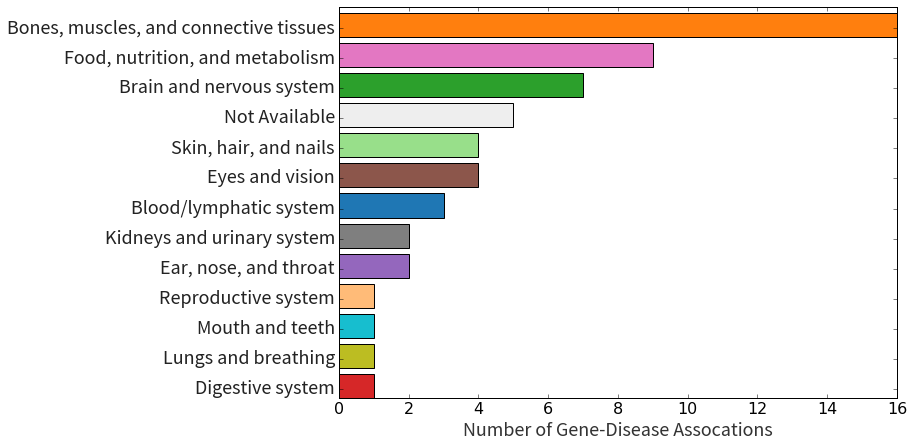

In [21]:
import matplotlib.font_manager as fm

# Histogram of categories

# Dictionary of category colors is catclr

# Number of GDAs in each category, groupby and count
sercount = dfall.groupby(['category']).count()['diseaseName']
sercats = sercount.copy()
sercats.sort_values(inplace=True)

numcats = len(sercats)
# print(sercats)


# mpl.rcParams['text.color'] = '#333333'
plt.rc('font', size='20')
prop = fm.FontProperties(fname='/Library/fonts/SourceSansPro-Regular.ttf')

fig = plt.figure(figsize=(10,7))
for x,idx,cat in zip(np.arange(numcats),sercats.index,sercats.values):
    plt.barh(x, cat, color=catclr[idx])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.yticks(np.arange(len(sercats))+0.3,sercats.index, color='#222222',fontproperties=prop)
plt.xlabel('Number of Gene-Disease Assocations', color='#333333', fontproperties=prop)
# plt.title('Category Distribution of Gene-Disease Associations', color='#333333')
plt.ylim(0,numcats)


# plt.savefig('../genediseaselink-web/static/catdist.png',bbox_inches='tight',dpi=150)
plt.show()

In [ ]:
# For pull-down menu list

disease_dict = {'immune': 'Immune system', 'mouth': 'Mouth and teeth', 
                'kidney': 'Kidneys and urinary system', 
                'reproductive': 'Reproductive system', 
                'metabolism': 'Food, nutrition, and metabolism', 
                'digest': 'Digestive system', 'blood': 'Blood/lymphatic system', 
                'bone': 'Bones, muscles, and connective tissues', 
                'ent': 'Ear, nose, and throat', 'not': "Not Available",
                'endocrine': 'Endocrine system (hormones)', 'all': 'All', 
                'eye': 'Eyes and vision', 'cancer': 'Cancers', 'skin': 
                'Skin, hair, and nails', 'heart': 'Heart and circulation', 
                'mental': 'Mental health and behavior', 
                'brain': 'Brain and nervous system', 'lung': 'Lungs and breathing'}

newdict = {k: v for k, v in disease_dict.items() 
           if (v in dfall.category.unique()) or (k in 'all') or (k in 'not')}
print(newdict)

In [ ]:
dfall.category.unique().tolist()